In [6]:
import kagglehub


In [7]:
# Download latest version
path = kagglehub.dataset_download("siddharth0935/airline-loyalty-program")
        
print("Path to dataset files:", path)

100%|██████████| 2.59M/2.59M [00:00<00:00, 4.15MB/s]

Extracting model files...


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\siddharth0935\airline-loyalty-program\versions\1


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
air_cia_dict = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_3\Day1\Group Task\Airline Loyalty Data Dictionary.csv")
air_cia_dict

,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Total Flights,Sum of Flights Booked (all tickets purchased i...
4,NaN,Distance,Flight distance traveled in the period (km)
5,NaN,Points Accumulated,Loyalty points accumulated in the period
6,NaN,Points Redeemed,Loyalty points redeemed in the period
7,NaN,Dollar Cost Points Redeemed,Dollar equivalent for points redeemed in the p...
8,Customer Loyalty History,Loyalty Number,Customer's unique loyalty number
9,NaN,Country,Country of residence


In [5]:
air_cia_dict.isna().sum()


Table          22
Field           0
Description     0
dtype: int64

In [5]:
calendar = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_3\Day1\Group Task\Calendar.csv")
calendar.head()


,Date,Start of Year,Start of Quarter,Start of Month
0,2012-01-01,2012-01-01,2012-01-01,2012-01-01
1,2012-01-02,2012-01-01,2012-01-01,2012-01-01
2,2012-01-03,2012-01-01,2012-01-01,2012-01-01
3,2012-01-04,2012-01-01,2012-01-01,2012-01-01
4,2012-01-05,2012-01-01,2012-01-01,2012-01-01


In [7]:
calendar.shape

(2557, 4)

In [8]:
calendar.isna().sum()

Date                0
Start of Year       0
Start of Quarter    0
Start of Month      0
dtype: int64

In [6]:
flight_activity = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_3\Day1\Group Task\Customer Flight Activity.csv")
flight_activity.head()


,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [7]:
flight_per_year = flight_activity.groupby(['Loyalty Number', 'Year'])['Total Flights'].sum().reset_index()
flight_per_year                                   

,Loyalty Number,Year,Total Flights
0,100018,2017,24
1,100018,2018,22
2,100102,2017,25
3,100102,2018,26
4,100140,2017,22
...,...,...,...
32498,999940,2017,7
32499,999940,2018,11
32500,999982,2017,0
32501,999982,2018,6


In [23]:
pivot_f = flight_per_year.pivot(index='Loyalty Number',columns='Year', values='Total Flights').fillna(0)
print(pivot_f)

Year            2017  2018
Loyalty Number            
100018          24.0  22.0
100102          25.0  26.0
100140          22.0  25.0
100214          10.0  12.0
100272          20.0  17.0
...              ...   ...
999902          27.0  23.0
999911           0.0   0.0
999940           7.0  11.0
999982           0.0   6.0
999986           0.0  40.0

[16737 rows x 2 columns]


In [18]:
flight_activity.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [9]:
flight_activity.shape

(392936, 8)

In [10]:
flight_activity.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [8]:
loyal_hist = pd.read_csv(r"C:\Users\User\Desktop\IronHack\Week_3\Day1\Group Task\Customer Loyalty History.csv")
loyal_hist.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [151]:
loyal_hist.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [49]:
loyal_hist['Enrollment Type'].value_counts()

Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

In [43]:
loyal_hist['Country'].unique()

array(['Canada'], dtype=object)

In [45]:
loyal_hist['City'].value_counts()

City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
Dawson Creek       444
Fredericton        425
Regina             409
Kingston           401
Tremblant          398
Victoria           389
Hull               358
West Vancouver     324
St. John's         258
Thunder Bay        256
Sudbury            227
Moncton            211
Calgary            191
Banff              179
London             174
Peace River        113
Whitehorse         110
Kelowna             88
Charlottetown       66
Name: count, dtype: int64

In [21]:
loyal_hist['Loyalty Card'].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

In [12]:
loyal_hist.shape

(16737, 16)

In [19]:
loyal_hist['Loyalty Number'].nunique()

16737

In [ ]:
gender_count = loyal_hist['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, colors=['blue','pink']) 
plt.title('Gender')
plt.show()

sns.barplot(data=loyal_hist, x='rating', y='avg_duration', palette='Blues_d')
plt.title('Duração média por classificação')
plt.ylabel('Duração média (minutos)')
plt.xlabel('Classificação')

In [38]:
#cust = flight_activity.groupby('Loyalty Number','Year', as_index=False).sum()
flight_per_year_2= flight_activity.groupby(['Loyalty Number', 'Year'])['Total Flights'].sum().reset_index()
flight_per_year_2    

,Loyalty Number,Year,Total Flights
0,100018,2017,24
1,100018,2018,22
2,100102,2017,25
3,100102,2018,26
4,100140,2017,22
...,...,...,...
32498,999940,2017,7
32499,999940,2018,11
32500,999982,2017,0
32501,999982,2018,6


In [70]:
air_merge.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,5,4,4908,4908.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,6,4,6948,6948.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,8,4,5516,5516.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2018,4,4,4376,4376.0,0,0


In [9]:
air_merge = pd.merge(loyal_hist, flight_activity, on='Loyalty Number', how='inner')
air_merge.isna().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                          99565
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              344380
Cancellation Month             344380
Year                                0
Month                               0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [ ]:
#1 Frequent fliers (high flight count and distance) accumulate more points and show higher CLV.**
#2. **Demographics such as education, salary, and marital status influence loyalty engagement and lifetime value.**
#3. **Customers who redeem points frequently are more likely to stay active or spend more.**


In [11]:
import seaborn as sns


In [ ]:
#2. **Demographics such as education, salary, and marital status influence loyalty engagement and lifetime value.**


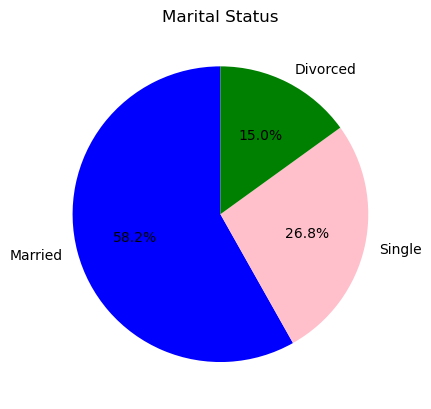

In [82]:
marital_count = loyal_hist['Marital Status'].value_counts()
plt.pie(marital_count, labels=marital_count.index, autopct='%1.1f%%', startangle=90, colors=['blue','pink','green']) 
plt.title('Marital Status')
plt.show()

In [54]:
mean_clv_mar = air_merge.groupby('Marital Status')['CLV'].mean().reset_index()

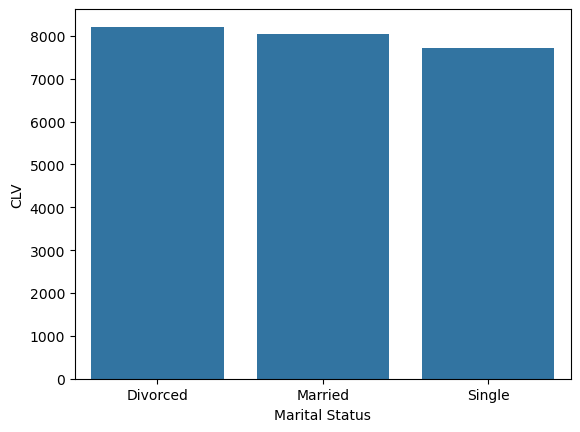

In [57]:
sns.barplot(x='Marital Status', y='CLV', data=mean_clv_mar)
plt.show()
# CLV : lucro total que gera para a empresa 
# The mean (average) of CLV(life value) per Marital status

In [61]:
mean_points_mar = air_merge.groupby('Marital Status')['Points Accumulated'].mean()

In [76]:
mean_fly_mar = air_merge.groupby('Marital Status')['Total Flights'].mean()

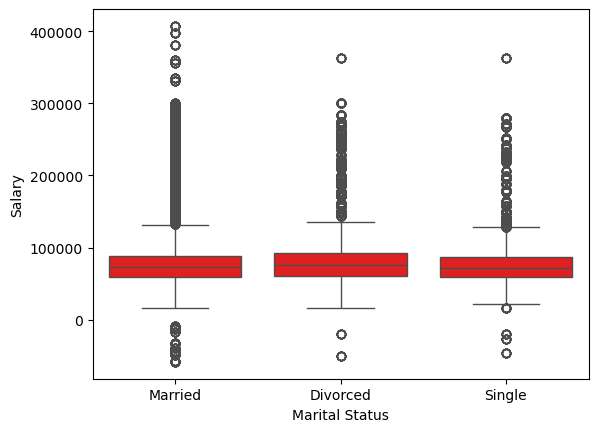

In [79]:
sns.boxplot(x='Marital Status', y='Salary', data=air_merge,color='red')
plt.show()


In [130]:
mean_pointsredee_mar = air_merge.groupby('Marital Status')['Points Redeemed'].mean()
mean_pointsredee_mar

Marital Status
Divorced    31.572158
Married     31.218006
Single      31.340973
Name: Points Redeemed, dtype: float64

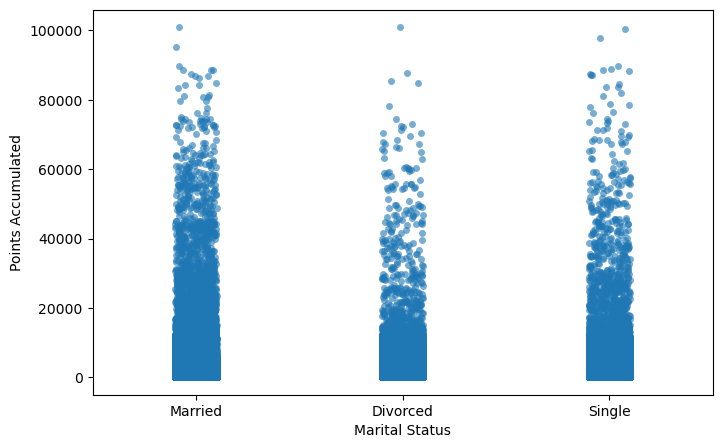

In [94]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x="Marital Status", 
    y="Points Accumulated", 
    data=air_merge,
    jitter=True,
    alpha=0.6
)
plt.show()

In [ ]:
# The divorceds is not motivated by the points.

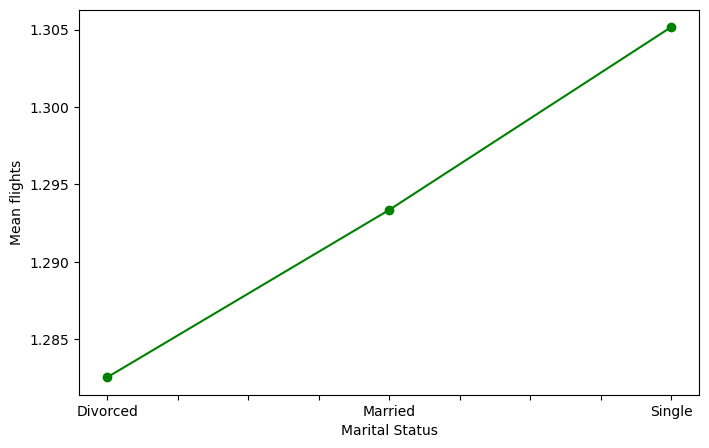

In [78]:
plt.figure(figsize=(8,5))
mean_fly_mar.plot(kind='line',marker='o', color='green')
plt.ylabel('Mean flights')
plt.grid=True
plt.show()

In [ ]:
# Divorceds are the ones that flight less, maybe less frequency but more expensive. Try to sell upgrades or retain throuth exclusive services.

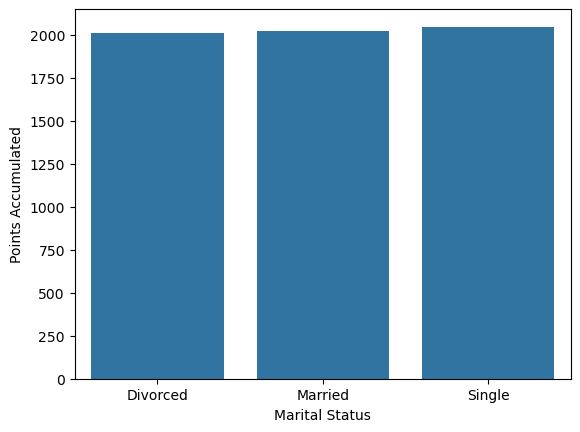

In [63]:
sns.barplot(x='Marital Status', y='Points Accumulated', data=mean_points_mar)
plt.show()

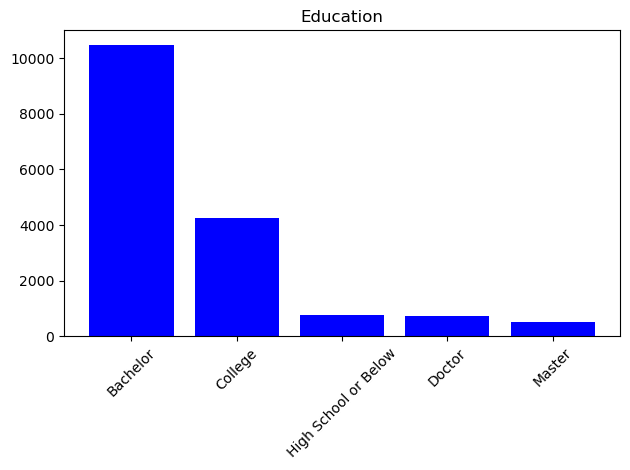

In [83]:
education_counts = loyal_hist['Education'].value_counts()
plt.bar(education_counts.index, education_counts.values,color='blue') 
plt.title('Education')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
mean_clv_educ = air_merge.groupby('Education')['CLV'].mean().reset_index()

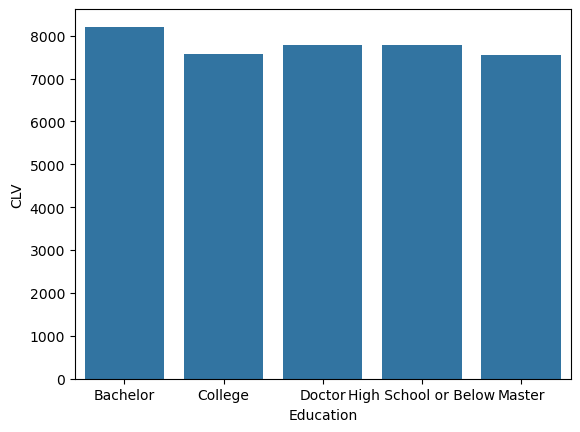

In [50]:
sns.barplot(x='Education', y='CLV', data=mean_clv_educ)
plt.show()

In [134]:
mean_poi_educ = air_merge.groupby('Education')['Points Accumulated'].mean().reset_index()

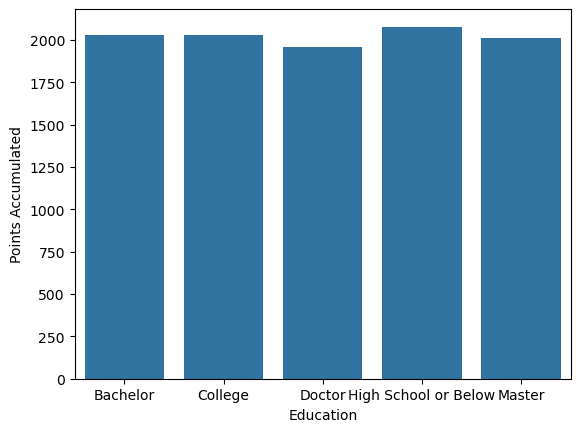

In [113]:
sns.barplot(x='Education', y='Points Accumulated', data=mean_poi_educ)
plt.show()

In [133]:
mean_sal_educ = air_merge.groupby('Salary')['Points Accumulated'].mean()

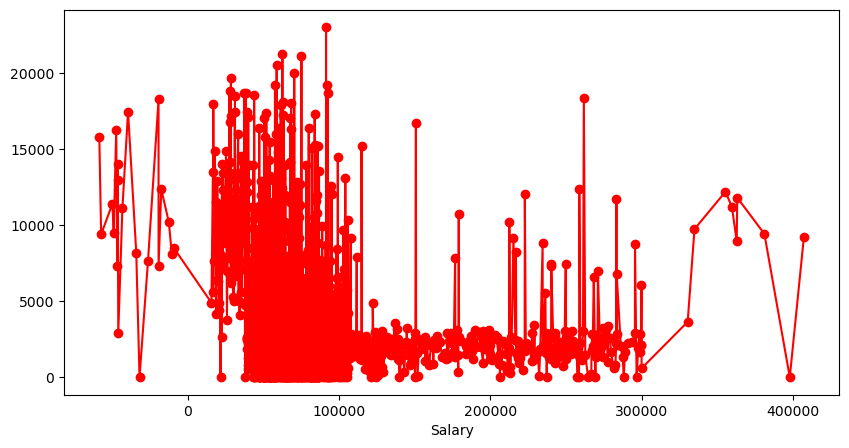

In [75]:
plt.figure(figsize=(10,5))
mean_sal_educ.plot(kind='line',marker='o', color='red')
plt.grid=True
plt.show()

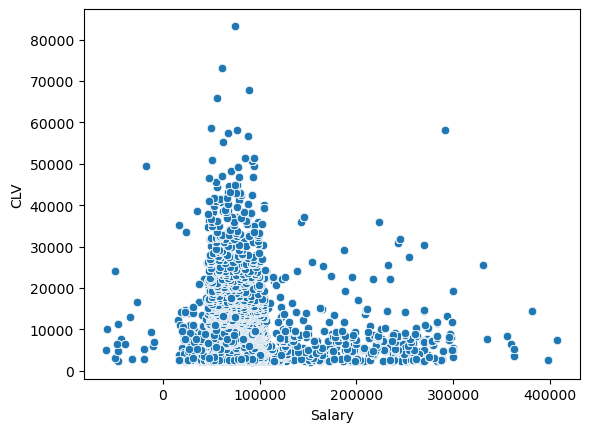

In [52]:
sns.scatterplot(x='Salary', y='CLV', data=air_merge)
plt.show()

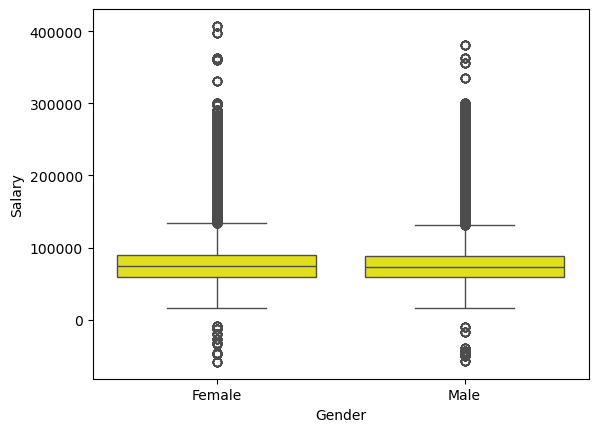

In [73]:
sns.boxplot(x='Gender', y='Salary', data=air_merge,color='yellow')
plt.show()

# indicates that the majority of clients are above the mean of salary 

In [132]:
mean_clv_sal = air_merge.groupby('Education')['Salary'].mean().reset_index()

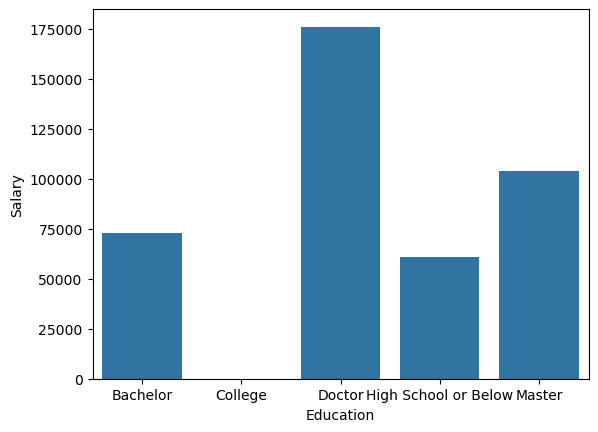

In [135]:
sns.barplot(x='Education', y='Salary', data=mean_clv_sal)
plt.show()

In [ ]:
# 1. **Frequent fliers (high flight count and distance) accumulate more points and show higher CLV.**


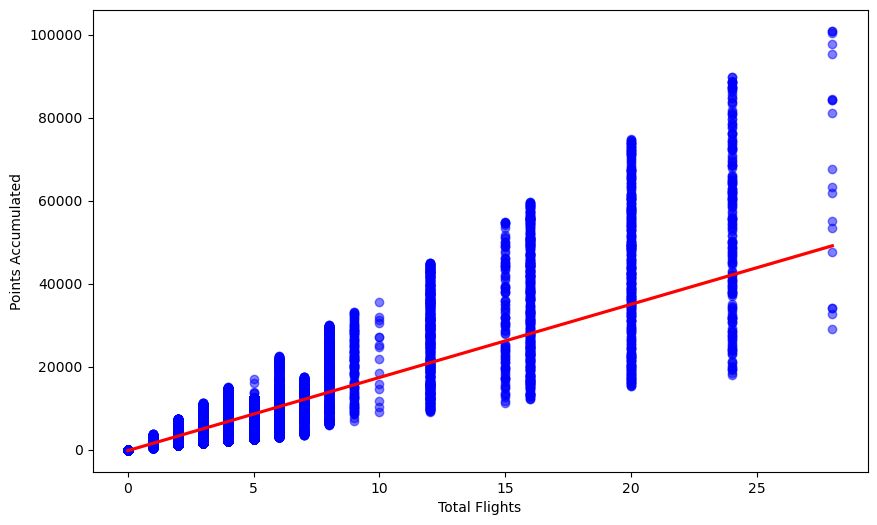

In [96]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Total Flights", 
    y="Points Accumulated", 
    data=air_merge,
    scatter_kws={"alpha": 0.5, "color": "blue"},
    line_kws={"color": "red"}
)

plt.show()

In [111]:
mean_card_points = air_merge.groupby('Loyalty Card')['Distance'].mean()
mean_card_points

Loyalty Card
Aurora    1955.074153
Nova      1947.382081
Star      1930.817111
Name: Distance, dtype: float64

In [115]:
mean_card_points = air_merge.groupby('Loyalty Card')['Points Accumulated'].mean().reset_index()

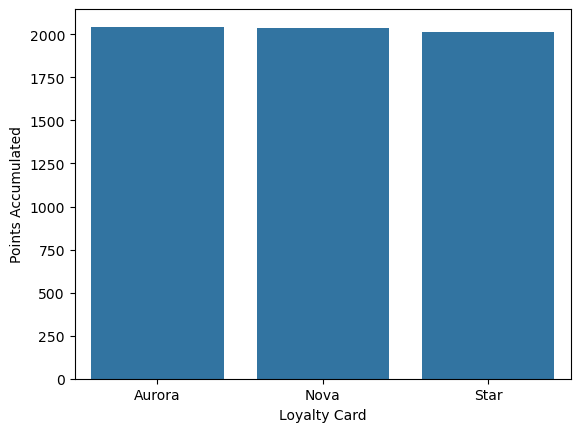

In [116]:
sns.barplot(x='Loyalty Card', y='Points Accumulated', data=mean_card_points)
plt.show()

In [119]:
mean_card_flights = air_merge.groupby('Loyalty Card')['Total Flights'].mean().reset_index()

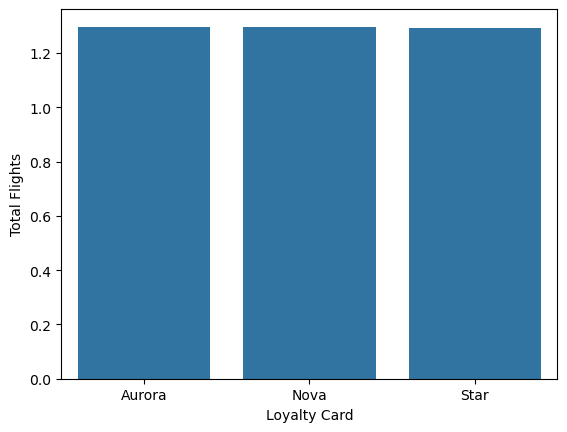

In [120]:
sns.barplot(x='Loyalty Card', y='Total Flights', data=mean_card_flights)
plt.show()

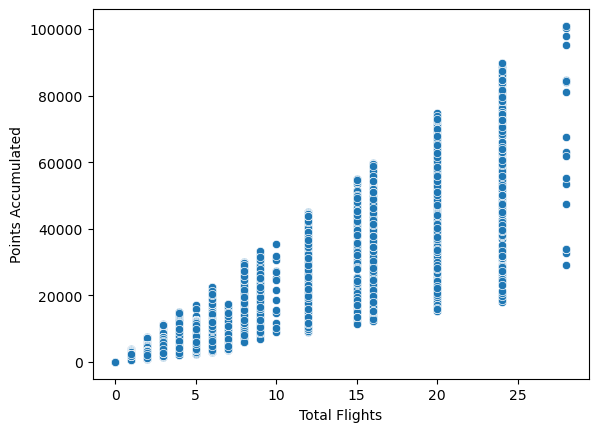

In [13]:
sns.scatterplot(x='Total Flights', y='Points Accumulated', data=air_merge)
plt.show()
# Logical result, more flights means more points accumulatted

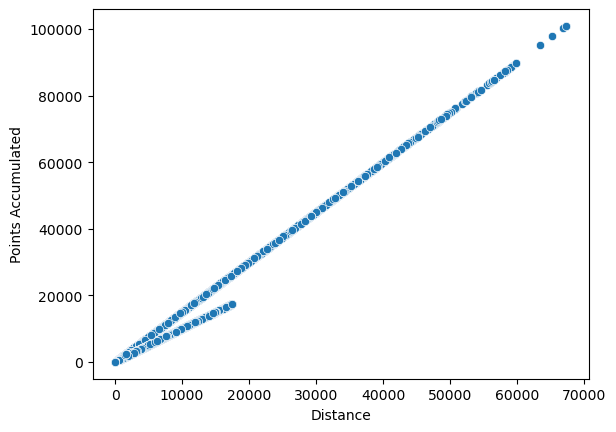

In [14]:
sns.scatterplot(x='Distance', y='Points Accumulated', data=air_merge)
plt.show()
# The same as the previous one, when the distance is bigger , accumulated more points

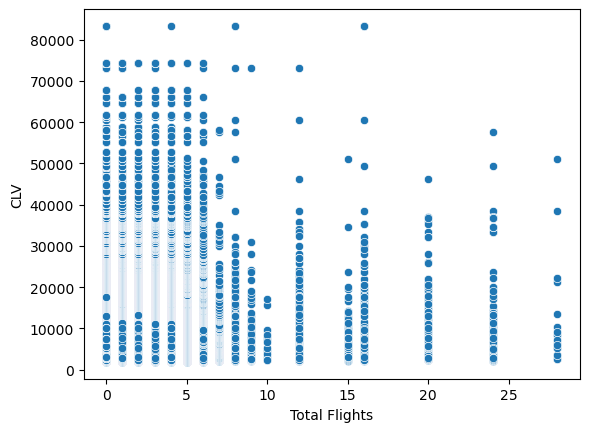

In [17]:
sns.scatterplot(x='Total Flights', y='CLV', data=air_merge)
plt.show()
# Show that persons with less fligths have more customer life value for the cia. 
# Could be passagers that flight less, but in expensive routes 
# Above we can see that, passagers with less flights, percour more distance, that why they have higher CLV

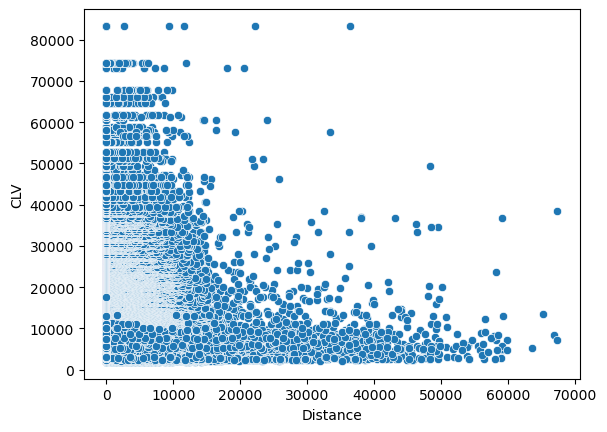

In [18]:
sns.scatterplot(x='Distance', y='CLV', data=air_merge)
plt.show()

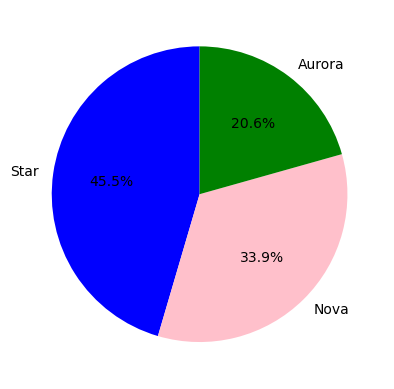

In [19]:
loyalty_card = air_merge['Loyalty Card'].value_counts()
plt.pie(loyalty_card, labels=loyalty_card.index, autopct='%1.1f%%', startangle=90, colors=['blue','pink','green']) 
plt.show()

In [22]:
mean_card_clv = air_merge.groupby('Loyalty Card')['CLV'].mean().reset_index()

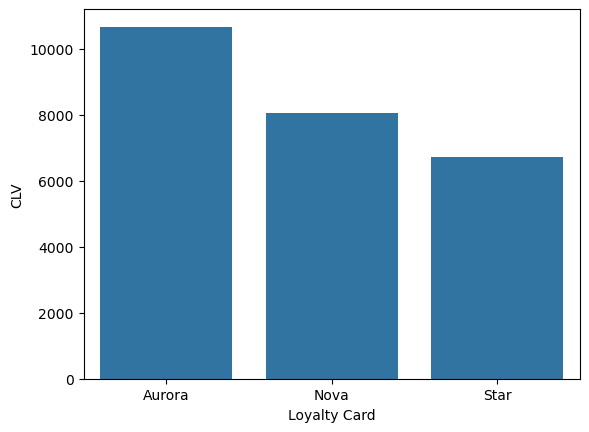

In [25]:
sns.barplot(x='Loyalty Card', y='CLV', data=mean_card_clv)
plt.show()
# Shows that the CLV is bigger in the passagers that have Loyalty Card Aurora

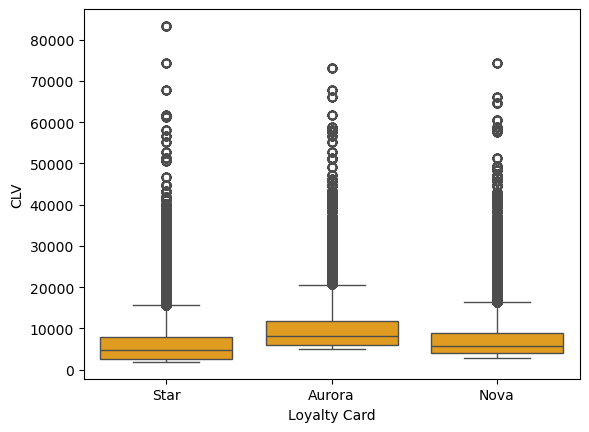

In [26]:
sns.boxplot(x='Loyalty Card', y='CLV', data=air_merge,color='orange')
plt.show()

In [118]:
air_merge.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2018,7,5,11355,11355.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,...,2,NaN,NaN,2017,5,4,4908,4908.0,0,0


In [ ]:
#  3. **Customers who redeem points frequently are more likely to stay active or spend more.**
# The active clients have more redeem points then the ones that canceled
# The actives have more CLV then the ones that cancelled

In [28]:
air_merge['Status'] = air_merge['Cancellation Year'].apply(lambda x: 'Cancelled' if pd.notnull(x) else 'Active')

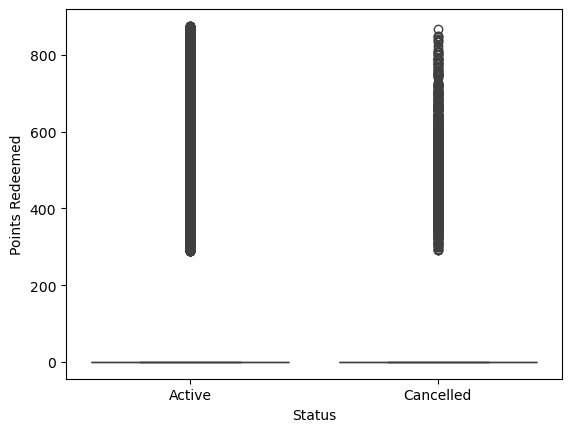

In [144]:
sns.boxplot(x='Status', y='Points Redeemed', data=air_merge)
plt.show()

In [142]:
mean_points = air_merge.groupby('Status')['Points Redeemed'].mean().reset_index()

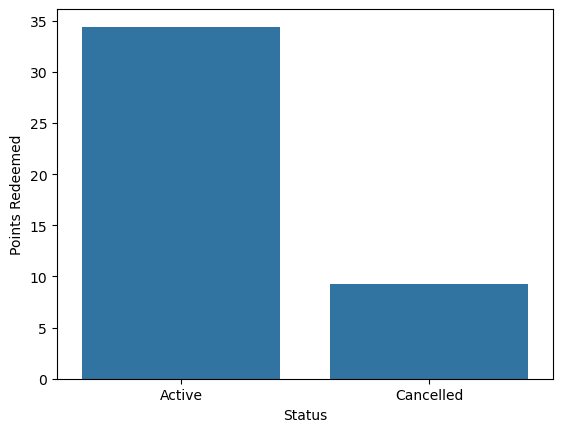

In [145]:
sns.barplot(x='Status', y='Points Redeemed', data=mean_points)
plt.show()

# Mean of points redeemed per status of clients ( active)

In [148]:
mean_points_clv = air_merge.groupby('Status')['CLV'].mean().reset_index()

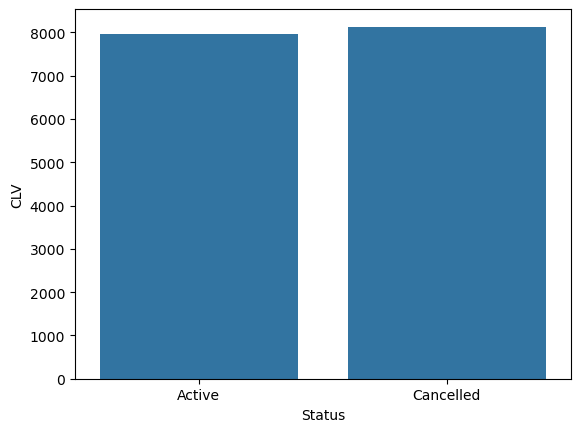

In [149]:
sns.barplot(x='Status', y='CLV', data=mean_points_clv)
plt.show()

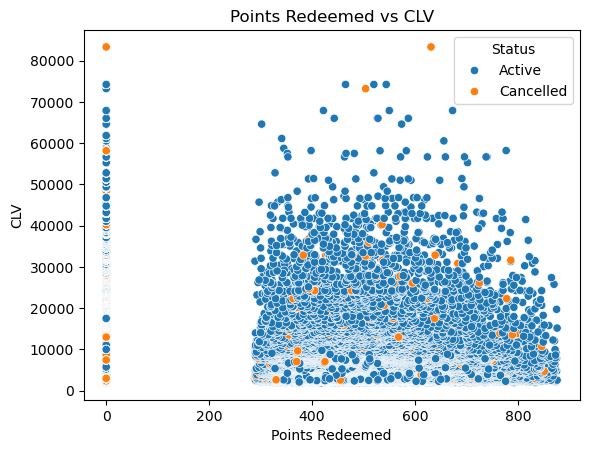

In [29]:
sns.scatterplot(data=air_merge, x='Points Redeemed', y='CLV', hue='Status')
plt.show()

In [32]:
mean_status_clv = air_merge.groupby('Status')['Total Flights'].mean().reset_index()

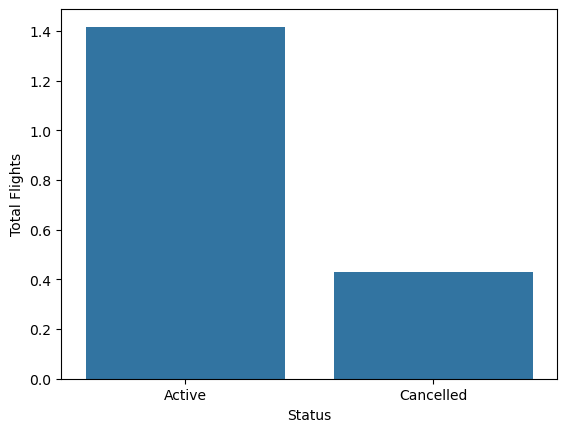

In [33]:
sns.barplot(x='Status', y='Total Flights', data=mean_status_clv)
plt.show()

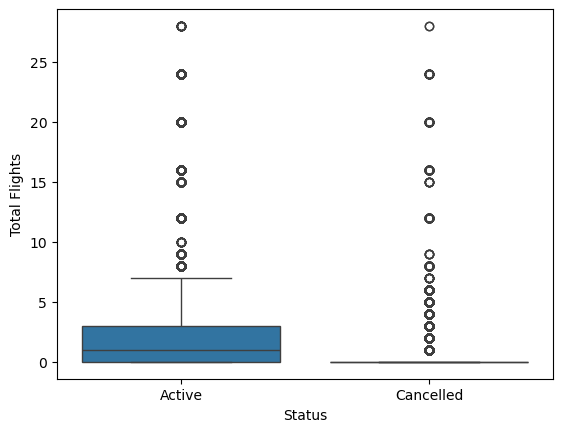

In [44]:
sns.boxplot(x='Status', y='Total Flights', data=air_merge)
plt.show()

In [39]:
mean_status_accum = air_merge.groupby('Status')['Points Accumulated'].mean().reset_index()

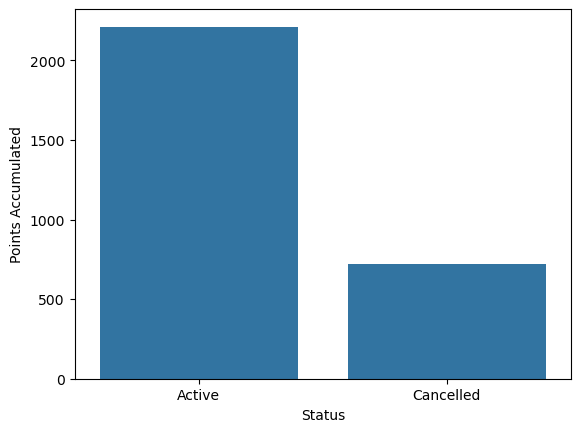

In [40]:
sns.barplot(x='Status', y='Points Accumulated', data=mean_status_accum)
plt.show()

In [42]:
mean_status_dist = air_merge.groupby('Status')['Distance'].mean().reset_index()

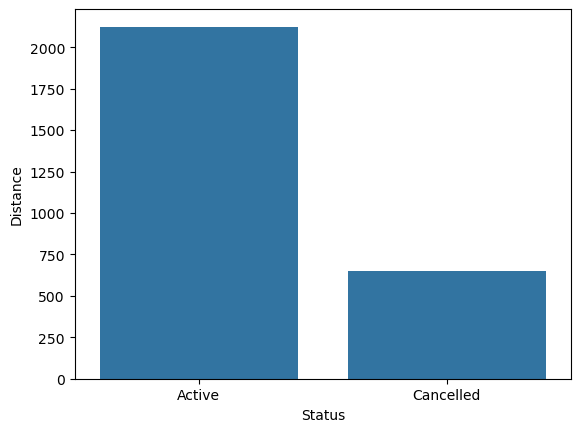

In [63]:
sns.barplot(x='Status', y='Distance', data=mean_status_dist)
plt.show()

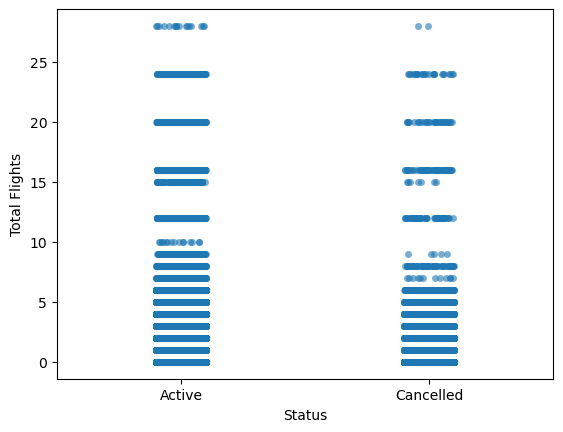

In [77]:
sns.stripplot(
    x="Status", 
    y="Total Flights", 
    data=air_merge,
    jitter=True,
    alpha=0.6)
plt.show()

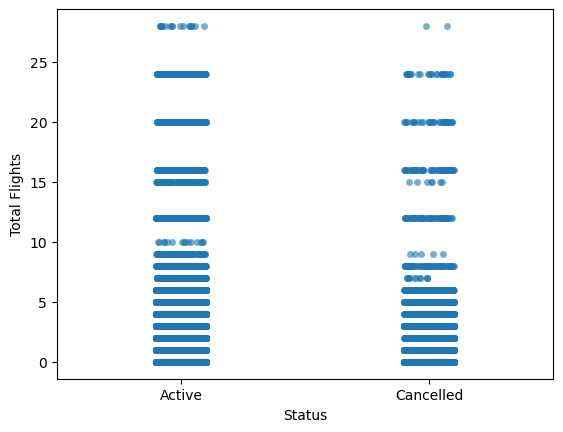

In [65]:
sns.stripplot(
    x="Status", 
    y="Total Flights", 
    data=air_merge,
    jitter=True,
    alpha=0.6)
plt.show()

# Is also possible to see that the clients that canceled , have less flights.

In [72]:
air_merge.to_csv('air_company.csv', index=False)

In [ ]:
loyalty_card = air_merge['Loyalty Card'].value_counts()
plt.pie(loyalty_card, labels=loyalty_card.index, autopct='%1.1f%%', startangle=90, colors=['blue','pink','green']) 
plt.show()